범주형 값은 여러 개의 다른 상태를 나타내는 값이다. 범주형 값을 'A', 'B', 'C'라는 문자로 표현하는 경우도 있고 '1', '2', '3'과 같이 숫자로 표현하는 경우도 있지만 이 경우는 'A'라는 글자대신 '1'이라는 글자를 이용한 것 뿐이지 숫자로서의 의미는 없다. 즉, '2'라는 값이 '1'이라는 값보다 2배 더 크다는 뜻이 아니다.

회귀분석을 할 때는 숫자가 아닌 독립변수 값은 쓸 수 없기 때문에 어떤 방식으로든 범주형 독립변수의 값을 사용할 수 있는 방법을 찾아야 한다. 범주형 독립변수를 처리하는 가장 일반적인 방법은 더미변수(dummy variable)로 변환하는 것이다.

## 더미변수

더미변수(dummy variable)는 0 또는 1만으로 표현되는 값으로 어떤 특징이 존재하는가 존재하지 않는가를 표시하는 독립변수다. 다음과 같은 명칭으로도 불린다.

+ Boolean indicator
+ binary variable
+ indicator variable
+ design variable
+ treatment

patsy 패키지의 dmatrix 명령과 OLS 클래스의 from_formula 메서드는 포뮬러 문자열을 이용하여 범주형 변수의 값을 더미변수로 인코딩하는 기능을 제공한다.

In [1]:
from patsy import *

## 범주형 변수가 하나인 경우

𝑥1,𝑥2,…,𝑥𝐷 라는  𝐷 개의 독립변수를 가지는 선형회귀모형을 생각하자.

$$\hat{y} = w_0 + w_1x_1 + w_2x_2 + \cdots + w_Dx_D$$

여기에서  𝑥1 이라는 독립변수만 범주형 변수이고 'A'과 'B'라는 두 가지의 범주값을 가질 수 있다고 하자.

가장 간단한 방법은 전체 데이터를  𝑥1=𝐴 인 데이터와  𝑥2=𝐵 인 데이터 두 그룹으로 나누어 각각의 데이터에 대한 선형회귀모형을 만드는 것이다. 즉 다음과 같은 2개의 선형회귀모형을 만든다.

$$\text{model A}:\;\; \hat{y} = w_{A,0} \; + w_{A,2}x_2 + \cdots + w_{A,D}x_D \;\; (\text{if } x_1 = A)$$

$$\text{model B}:\;\; \hat{y} = w_{B,0} \; + w_{B,2}x_2 + \cdots + w_{B,D}x_D \;\; (\text{if } x_1 = B)$$

그런데 올바른 선형회귀모형에서는  𝑥1 이 아닌 다른 변수 예를 들어  𝑥2 의 값이 변할 때  𝑦 값이 변화하는 정도, 즉 가중치  𝑤2 는  𝑥1 의 값이 A이든 B든 같아야 한다. 하지만 위와 같은 두 개의 선형회귀모형을 만들면  𝑤2 의 값이  𝑤𝐴,2 와  𝑤𝐵,2 라는 두 가지의 다른 값이 나오므로 위 모형은 적당하지 않다.

더미변수 방법은 범주형 변수  𝑥1 을  𝑑1𝐴,𝑑1𝐵 라는 두 개의 더미변수로 바꾸는 것이다. 더미변수로 변환하면 상수항은 없어진다. 그 이유는 나중에 설명한다.

\begin{aligned}
\hat{y} &= w_0 && + && \hspace{1cm} w_1 x_1          & +  w_2 x_2  + \cdots  + w_D x_D \\
        &      &&   && \hspace{1.2cm} \downarrow       &     \\
\hat{y} &=     &&   && w_{1A} d_{1A} + w_{1B} d_{1B} & +  w_2 x_2  + \cdots  + w_D x_D \\
\end{aligned}

더미변수가 2개인 이유는 더미변수가 가질 수 있는 범주값이 2개이기 때문이다. 범주값이  𝐾 개이면 범주형 변수  𝑥1 을  𝑑11,…,𝑑1𝐾 라는  𝐾 개의 더미변수로 바꾸어야 한다.

##### 더미변수의 값은 항상 0 또는 1이어야 하는데 더미변수의 값을 지정하는 방법에는 축소랭크(reduced-rank) 방식과 풀랭크(full-rank) 방식 두가지가 있다.

## 풀랭크 방식

풀랭크(full-rank) 방식에서는 더미변수의 값을 원핫인코딩(one-hot-encoding) 방식으로 지정한다. 즉 범주값이 2가지인 경우에는

\begin{aligned}
x_1=A \;\;&\rightarrow\;\;  d_{1A}=1,\, d_{1B} = 0 \\
x_1=B \;\;&\rightarrow\;\;  d_{1A}=0,\, d_{1B} = 1 \\
\end{aligned}

이 된다. 이 값을 대입하면 더미변수의 가중치는 상수항이 된다.

\begin{aligned}
x_1=A \;\;&\rightarrow\;\;  \hat{y} = w_{1A} + w_2 x_2  + \cdots  + w_D x_D \\
x_1=B \;\;&\rightarrow\;\;  \hat{y} = w_{1B} + w_2 x_2  + \cdots  + w_D x_D \\
\end{aligned}

다시 말해 범주값이 달라지면 상수항만 달라지고 다른 독립변수의 가중치(영향)는 같은 모형이 되는 것이다.

[그림] 풀랭크방식 더미변수 가중치의 의미 : https://datascienceschool.net/upfiles/cc2b959c098f4e3ebf82743eca24b326.png

###### 선형회귀모형에 범주형 독립변수가 있으면 더미변수의 가중치 이외에 별도의 상수항이 있으면 안된다. 

만약 위의 모형에서 별도의 상수항  𝑤0 이 존재한다면 모형은 다음과 같이 될 것이다.

\begin{aligned}
x_1=A \;\;&\rightarrow\;\;  \hat{y} = (w_0 + w_{1A}) + w_2 x_2  + \cdots  + w_D x_D \\
x_1=B \;\;&\rightarrow\;\;  \hat{y} = (w_0 + w_{1B}) + w_2 x_2  + \cdots  + w_D x_D \\
\end{aligned}

이 경우에는  𝑤0+𝑤1𝐴 나  𝑤0+𝑤1𝐵 의 값은 구할 수 있어도  𝑤0  값과  𝑤1𝐴  값을 분리할 수는 없다. 범주형 독립변수가 있으면 상수항은 포함시키지 않는다.

patsy 패키지는 변수의 값이 문자이면 자동으로 범주형 독립변수로 인식한다. 풀랭크 모형을 사용하려면 포뮬러 문자열에 +0 또는 -1을 붙여야 한다. 더미변수의 이름은 자동으로 원래변수의 이름 + [범주값]으로 정해진다.

In [2]:
import pandas as pd

df1 = pd.DataFrame(["A", "A", "B", "B"], columns=["x1"])
df1

,x1
0,A
1,A
2,B
3,B


In [3]:
dmatrix("x1 + 0", df1)

DesignMatrix with shape (4, 2)
  x1[A]  x1[B]
      1      0
      1      0
      0      1
      0      1
  Terms:
    'x1' (columns 0:2)

In [4]:
dmatrix("x1 - 1", df1)

DesignMatrix with shape (4, 2)
  x1[A]  x1[B]
      1      0
      1      0
      0      1
      0      1
  Terms:
    'x1' (columns 0:2)

데이터가 범주형 값이지만 정수로 표시된 경우에는 C( ) 연산자를 이용하여 범주형 값임을 명시적으로 지정할 수 있다.

In [5]:
df2 = pd.DataFrame([1, 2, 3, 4], columns=["x1"])
df2

,x1
0,1
1,2
2,3
3,4


In [6]:
dmatrix("C(x1) - 1", df2)

DesignMatrix with shape (4, 4)
  C(x1)[1]  C(x1)[2]  C(x1)[3]  C(x1)[4]
         1         0         0         0
         0         1         0         0
         0         0         1         0
         0         0         0         1
  Terms:
    'C(x1)' (columns 0:4)

## 축소랭크 방식

축소랭크(reducec-rank) 방식에서는 특정한 하나의 범주값을 기준값(reference, baseline)으로 하고 기준값에 대응하는 더미변수의 가중치는 항상 1로 놓는다. 

다른 범주형 값을 가지는 경우는 기준값에 추가적인 특성이 있는 것으로 간주한다. 예를 들어 다음 축소랭크 방식은  𝑥1=𝐴 를 기준값으로 하는 경우이다.

\begin{aligned}
x_1=A \;\;&\rightarrow\;\;  d_{1A}=1,\, d_{1B} = 0 \\
x_1=B \;\;&\rightarrow\;\;  d_{1A}=1,\, d_{1B} = 1 \\
\end{aligned}

반대로  𝑥1=𝐵 를 기준값으로 하면 다음과 같아진다.

\begin{aligned}
x_1=A \;\;&\rightarrow\;\;  d_{1A}=1,\, d_{1B} = 1 \\
x_1=B \;\;&\rightarrow\;\;  d_{1A}=0,\, d_{1B} = 1 \\
\end{aligned}

이 값을 대입하면 기준값인 더미변수의 가중치는 상수항이 되고 나머지 더미변수의 가중치는 그 상수항에 추가적으로 더해지는 상수항이 된다.  𝑥1=𝐴 를 기준값으로 하는 경우에는 다음과 같다.

\begin{aligned}
x_1=A \;\;&\rightarrow\;\;  \hat{y} = w_{1A}          &+ w_2 x_2  + \cdots  + w_D x_D \\
x_1=B \;\;&\rightarrow\;\;  \hat{y} = w_{1A} + w_{1B} &+ w_2 x_2  + \cdots  + w_D x_D \\
\end{aligned}

[그림] 축소랭크 방식 더미변수 가중치의 의미 : https://datascienceschool.net/upfiles/5cdba8a462f44c1c9f91446b6af3122b.png

patsy에서 포뮬러 문자열에 +0 또는 -1이 없으면 축소랭크 방식으로 간주한다. 별도로 지정하지 않으면 알파벳 순서로 가장 빠른 범주값이 기준값이 된다. 축소랭크 방식에서는 범주값 이름 앞에 Treatment를 뜻하는 T. 기호가 붙는다.

In [7]:
df3 = pd.DataFrame(["A", "B", "C"], columns=["x1"])
df3

,x1
0,A
1,B
2,C


In [8]:
dmatrix("x1", df3)

DesignMatrix with shape (3, 3)
  Intercept  x1[T.B]  x1[T.C]
          1        0        0
          1        1        0
          1        0        1
  Terms:
    'Intercept' (column 0)
    'x1' (columns 1:3)

만약 기준값을 다른 값으로 바꾸고 싶으면 Treatment 연산자를 사용한다. 다음 코드에서는 B를 기준값으로 사용하였다.

In [9]:
dmatrix("C(x1, Treatment('B'))", df3)

DesignMatrix with shape (3, 3)
  Intercept  C(x1, Treatment('B'))[T.A]  C(x1, Treatment('B'))[T.C]
          1                           1                           0
          1                           0                           0
          1                           0                           1
  Terms:
    'Intercept' (column 0)
    "C(x1, Treatment('B'))" (columns 1:3)

## 하나의 범주형 독립변수가 있는 회귀분석

### 예제

월(month)을 독립변수로 하여 해당 월의 기온을 예측하는 회귀분석을 해보자. 데이터는 다음과 같다.

In [19]:
import statsmodels.api as sm

In [20]:
df_nottem = sm.datasets.get_rdataset("nottem").data

일단 다음 코드를 사용하여 연단위(year fraction) 데이터에서 월을 추출해낸다.

In [21]:
import datetime
from calendar import isleap

def convert_partial_year(number):
    year = int(number)
    d = datetime.timedelta(days=(number - year) * (365 + isleap(year)))
    day_one = datetime.datetime(year, 1, 1)
    date = d + day_one
    return date

In [22]:
df_nottem.tail()

,time,value
235,1939.583333,61.8
236,1939.666667,58.2
237,1939.750000,46.7
238,1939.833333,46.6
239,1939.916667,37.8


In [23]:
df_nottem["date0"] = df_nottem[["time"]].applymap(convert_partial_year)
df_nottem.tail()

,time,value,date0
235,1939.583333,61.8,1939-08-01 21:59:59.999897
236,1939.666667,58.2,1939-09-01 08:00:00.000103
237,1939.750000,46.7,1939-10-01 18:00:00.000000
238,1939.833333,46.6,1939-11-01 03:59:59.999897
239,1939.916667,37.8,1939-12-01 14:00:00.000103


In [24]:
df_nottem["date"] = pd.DatetimeIndex(df_nottem["date0"]).round('60min') + datetime.timedelta(seconds=3600*24)
df_nottem.tail()

,time,value,date0,date
235,1939.583333,61.8,1939-08-01 21:59:59.999897,1939-08-02 22:00:00
236,1939.666667,58.2,1939-09-01 08:00:00.000103,1939-09-02 08:00:00
237,1939.750000,46.7,1939-10-01 18:00:00.000000,1939-10-02 18:00:00
238,1939.833333,46.6,1939-11-01 03:59:59.999897,1939-11-02 04:00:00
239,1939.916667,37.8,1939-12-01 14:00:00.000103,1939-12-02 14:00:00


In [25]:
df_nottem["month"] = df_nottem["date"].dt.strftime("%m").astype('category')
df_nottem.tail()

,time,value,date0,date,month
235,1939.583333,61.8,1939-08-01 21:59:59.999897,1939-08-02 22:00:00,08
236,1939.666667,58.2,1939-09-01 08:00:00.000103,1939-09-02 08:00:00,09
237,1939.750000,46.7,1939-10-01 18:00:00.000000,1939-10-02 18:00:00,10
238,1939.833333,46.6,1939-11-01 03:59:59.999897,1939-11-02 04:00:00,11
239,1939.916667,37.8,1939-12-01 14:00:00.000103,1939-12-02 14:00:00,12


In [26]:
del df_nottem["date0"], df_nottem["date"]
df_nottem.tail()

,time,value,month
235,1939.583333,61.8,08
236,1939.666667,58.2,09
237,1939.750000,46.7,10
238,1939.833333,46.6,11
239,1939.916667,37.8,12


이 데이터를 박스플롯으로 시각화한다.

In [27]:
import matplotlib.pylab as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import seaborn as sns
import numpy as np

sns.set_style("whitegrid")
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.size'] = 12

path = "/Library/Fonts/NanumGothic.otf"
font_name = fm.FontProperties(fname=path, size=20).get_name()

plt.rc('font', family=font_name)

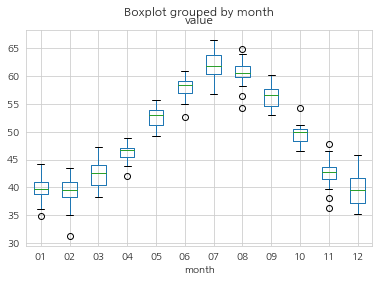

In [28]:
df_nottem.boxplot("value", "month") # 기온, 월
plt.show()

풀랭크 방식으로 더미변수를 만들어 회귀분석을 하면 각 월의 평균 기온을 구할 수 있다. 월 데이터가 숫자이므로 연속값으로 인식하지 않도록 C() 연산자를 사용하였다.

In [29]:
model = sm.OLS.from_formula("value ~ C(month) + 0", data=df_nottem) # 풀랭크 방식(+0)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     277.3
Date:                Tue, 13 Aug 2019   Prob (F-statistic):          2.96e-125
Time:                        13:16:50   Log-Likelihood:                -535.82
No. Observations:                 240   AIC:                             1096.
Df Residuals:                     228   BIC:                             1137.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
C(month)[01]    39.6950      0.518     76.691   

포뮬러 문자열에서 +0을 제외하면 축소랭크 방식을 사용한다. 이 때는 1월의 평균 기온을 기준으로 각 월의 평균 기온이 얼마나 더 높은지를 나타내는 값이 회귀모형의 계수가 된다.

In [30]:
model1 = sm.OLS.from_formula("value ~ C(month)", df_nottem)
result1 = model1.fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     277.3
Date:                Tue, 13 Aug 2019   Prob (F-statistic):          2.96e-125
Time:                        13:22:52   Log-Likelihood:                -535.82
No. Observations:                 240   AIC:                             1096.
Df Residuals:                     228   BIC:                             1137.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         39.6950      0.518     76.

## 보스턴 집값 데이터의 범주형 변수

보스턴 집값 데이터는 CHAS라는 범주형 변수를 가지고 있다. 이 변수는 0과 1 두 개의 값(클래스)를 가지므로 이미 full rank 더미변수로 변환되어 있는 것과 비슷하다. 즉 다음과 같은 두 개의 모형을 각각 회귀분석하는 경우라고 볼 수 있다.

+ CHAS = 1 인 경우,

$$y = (w_0 + w_{\text{CHAS}}) + w_{\text{CRIM}} \text{CRIM} + w_{\text{ZN}} \text{ZN} + \cdots$$

+ CHAS = 0 인 경우,

$$y = w_0 + w_{\text{CRIM}} \text{CRIM} + w_{\text{ZN}} \text{ZN} + \cdots$$

In [32]:
from sklearn.datasets import load_boston

boston = load_boston()
dfX0_boston = pd.DataFrame(boston.data, columns=boston.feature_names)
dfX_boston = sm.add_constant(dfX0_boston)
dfy_boston = pd.DataFrame(boston.target, columns=["MEDV"])
df_boston = pd.concat([dfX_boston, dfy_boston], axis=1)

In [34]:
model = sm.OLS(dfy_boston, dfX_boston)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 13 Aug 2019   Prob (F-statistic):          6.72e-135
Time:                        13:31:36   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.0

위 분석에서 두 데이터 그룹은 찰스강에 인접하지 않은 집의 가격 모형은 상수항이  36.4595  이지만 찰스강에 인접한 집의 가격 모형은 상수항이  36.4595 +2.6867 이라는 것을 알 수 있다.

### Practice 1

1. from_formula 메서드를 사용하여 보스턴 집값 예측 문제를 다시 풀어라. C( ) 를 사용하여 범주형값임을 명시적으로 지정하는 것을 잊으면 안된다.

2. 모형 문자열에서 상수항을 없애지 말고 다시 푼다. 이때 CHAS 변수의 가중치는 무엇을 뜻하는가.

In [40]:
feature_names = list(boston.feature_names)
feature_names[3] = "C(CHAS)"
feature_names

['CRIM',
 'ZN',
 'INDUS',
 'C(CHAS)',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

In [41]:
model2 = sm.OLS.from_formula("MEDV ~ " + "+".join(feature_names), data=df_boston)
result2 = model2.fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 13 Aug 2019   Prob (F-statistic):          6.72e-135
Time:                        16:03:27   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         36.4595      5.103      7.

## ContrastMatrix

사용자가 원하는 특정한 더미변수 값을 지정하고 싶다면 ContrastMatrix 클래스를 사용한다. ContrastMatrix 행렬은 각 클래스가 인코딩될 벡터값 목록을 미리 정의한 행렬이다.

In [42]:
df4 = pd.DataFrame(["A", "B", "C", "A", "B"], columns=["x1"])
df4

,x1
0,A
1,B
2,C
3,A
4,B


예를 들어 위 데이터에서 B와 C 카테고리를 하나의 카테고리로 묶어서 인코딩하고 싶다면 다음처럼 코딩한다.

In [44]:
encoding_vectors = [[1, 0], [0, 1], [0, 1]]
label_postfix = [":A", ":BC"]
contrast = ContrastMatrix(encoding_vectors, label_postfix)
dmatrix("C(x1, contrast) + 0", df4)

DesignMatrix with shape (5, 2)
  C(x1, contrast):A  C(x1, contrast):BC
                  1                   0
                  0                   1
                  0                   1
                  1                   0
                  0                   1
  Terms:
    'C(x1, contrast)' (columns 0:2)

## 두 개 이상의 범주형 변수가 있는 경우

##### 두 개 이상의 범주형 변수가 있는 경우에는 축소형 방식을 사용한다. 

이 때 주의할 점은 모든 범주형 범수의 가중치는 기준값 상수항에 더해지는 상수항으로 취급된다. 예들 들어  𝑥1 은 A, B 의 두가지 값을 가지고  𝑥2 은 X, Y의 두가지 값을 가지고 값을 가지는 경우 상수항과 각 더미변수의 가중치의 의미는 다음과 같아진다.

\begin{aligned}
\hat{y} &= w_0    && + && w_1 x_1                 && + && w_2 x_2                 &+ \cdots  + w_D x_D \\
        &         &&   && \hspace{5pt} \downarrow &&   && \hspace{5pt} \downarrow & \\
\hat{y} &= w_{AX} && + && w_{1B} d_{1B}           && + && w_{2Y} d_{2Y}           &+ \cdots  + w_D x_D \\
\end{aligned}

+ 𝑤𝐴𝑋 : 기준값  𝑥1=𝐴,𝑥2=𝑋 인 경우의 상수항
+ 𝑤1,𝐵 : 기준값  𝑥1=𝐵,𝑥2=𝑋 인 경우에 추가되는 상수항
+ 𝑤1,𝑌 : 기준값  𝑥1=𝐴,𝑥2=𝑌 인 경우에 추가되는 상수항
+ 𝑤1,𝐵+𝑤1,𝑌 : 기준값  𝑥1=𝐵,𝑥2=𝑌 인 경우에 추가되는 상수항

In [45]:
df5 = pd.DataFrame([["A", "X"], ["B", "X"], ["A", "Y"], ["B", "Y"]], columns=["x1", "x2"])
df5

,x1,x2
0,A,X
1,B,X
2,A,Y
3,B,Y


In [46]:
dmatrix("x1 + x2", df5)

DesignMatrix with shape (4, 3)
  Intercept  x1[T.B]  x2[T.Y]
          1        0        0
          1        1        0
          1        0        1
          1        1        1
  Terms:
    'Intercept' (column 0)
    'x1' (column 1)
    'x2' (column 2)

[그림] 두개의 범주형 독립변수가 있는 경우 : https://datascienceschool.net/upfiles/69c177d3e0434a8b8c0790c657f10993.png

## 범주형 독립변수와 실수 독립변수의 상호작용

만약 범주형 변수의 값이 달라질 때 상수항만 달라지는 것이 아니라 다른 독립변수들이 미치는 영향도 달라지는 모형을 원한다면 상호작용(interaction)을 쓰면 된다. 예를 들어 범주형 독립변수  𝑥1 과 실수 독립변수  𝑥2 를 가지는 회귀모형에서 연속값 독립변수  𝑥2 가 미치는 영향 즉 가중치가 범주형 독립변수  𝑥1 의 값에 따라 달라진다면 범주형 독립변수를 더미변수  𝑑1 으로 인코딩하고 연속값 독립변수  𝑥2 는  𝑑1 과의 상호작용 항 d_1:x_2 를 추가하여 사용한다.

이 때 모형은 다음과 같아진다.

\begin{aligned}
\hat{y} 
&= w_0 + w_{1} x_1 \cdot w_2 x_2 \\
&= w_0 + (w_{1A}d_A + w_{1B}d_B) \cdot (w_2x_2) \\
&= w_0 + w_{2A} d_A x_2 + w_{2B} d_B  x_2 \\
\end{aligned}

𝑥1=𝐴 일 때는  𝑑𝐴=1,𝑑𝐵=0 에서

$$\hat{y} = w_0 + w_{2A}x_2$$

𝑥1=𝐵 일 때는  𝑑𝐴=0,𝑑𝐵=1 에서

$$\hat{y} = w_0 + w_{2B}x_2$$

이므로  𝑥1  범주값에 따라  𝑥2 의 기울기가 달라지는 모형이 된다.

In [47]:
df6 = pd.DataFrame([["A", 1], ["B", 2], ["A", 4], ["B", 5]], columns=["x1", "x2"])
df6

,x1,x2
0,A,1
1,B,2
2,A,4
3,B,5


In [48]:
dmatrix("C(x1):x2", df6)

DesignMatrix with shape (4, 3)
  Intercept  C(x1)[A]:x2  C(x1)[B]:x2
          1            1            0
          1            0            2
          1            4            0
          1            0            5
  Terms:
    'Intercept' (column 0)
    'C(x1):x2' (columns 1:3)

[그림] 범주형 독립변수와 실수독립변수의 상호작용이 있는 경우 : https://datascienceschool.net/upfiles/2ff6692d3de949db9a37f0765b6baaab.png

만약 범주형 독립변수도 종속변수에 영향을 미치고 범주형 독립변수와 실수 독립변수의 상호작용도 종속변수에 영향을 미친다면 모형은 다음과 같아진다.

\begin{aligned}
\hat{y} 
&= w_{1} x_1 + w_{12} x_1 \cdot w_2 x_2 \\
&= (w_{1A}d_A + w_{1B}d_B) + (w_{1A}d_A + w_{1B}d_B)\cdot (w_2x_2) \\
&= (w_{1A}d_A + w_{1B}d_B) + (w_{2A}d_A + w_{2B}d_B)x_2 \\
&= (w_{1A} + w_{2A} x_2)d_A + (w_{2B} + w_{2B}x_2)d_B \\
\end{aligned}

𝑥1=𝐴 일 때는  𝑑𝐴=1,𝑑𝐵=0 에서

$$\hat{y} =w_{1A} + w_{2A}x_2$$

𝑥1=𝐵 일 때는  𝑑𝐴=0,𝑑𝐵=1 에서

$$\hat{y} = w_{1B} + w_{2B}x_2$$

이므로  𝑥1  범주값에 따라 상수항과  𝑥2 의 기울기가 모두 달라지는 모형이 된다.

In [51]:
dmatrix("C(x1) + C(x1):x2", df6)

DesignMatrix with shape (4, 4)
  Intercept  C(x1)[T.B]  C(x1)[A]:x2  C(x1)[B]:x2
          1           0            1            0
          1           1            0            2
          1           0            4            0
          1           1            0            5
  Terms:
    'Intercept' (column 0)
    'C(x1)' (column 1)
    'C(x1):x2' (columns 2:4)

[그림] 범주형 독립변수, 범주형 독립변수와 실수 독립변수의 상호작용 모두 있는 경우 : https://datascienceschool.net/upfiles/f093b73d4e964688aab5d86cd54e932f.png

In [52]:
dmatrix("C(x1)*x2", df6)

DesignMatrix with shape (4, 4)
  Intercept  C(x1)[T.B]  x2  C(x1)[T.B]:x2
          1           0   1              0
          1           1   2              2
          1           0   4              0
          1           1   5              5
  Terms:
    'Intercept' (column 0)
    'C(x1)' (column 1)
    'x2' (column 2)
    'C(x1):x2' (column 3)

## 범주형 독립변수의 상호작용

두 개의 범주형 독립변수가 있고 서로 상호작용이 존재한다면 다음과 같은 모형이 된다.

\begin{aligned}
\hat{y} 
&= w_1 x_1 \cdot w_2 x_2 \\
&= (w_{1A}d_A + w_{1B}d_B) \cdot (w_{2X}d_X + w_{2Y}d_Y) \\
&= w_{AX}d_Ad_Y + w_{BX}d_Bd_X + w_{AY}d_Ad_Y + w_{BY}d_Bd_Y \\
\end{aligned}

즉 범주형 독립변수는 하나가 되고 대신 범주형 값이 두 독립변수의 범주형 값들의 조합인  𝐴𝑋,𝐵𝑋,𝐴𝑌,𝐵𝑌 의 네가지가 된다.

In [53]:
df5

,x1,x2
0,A,X
1,B,X
2,A,Y
3,B,Y


In [54]:
dmatrix("x1:x2 + 0", df5)

DesignMatrix with shape (4, 4)
  x1[A]:x2[X]  x1[B]:x2[X]  x1[A]:x2[Y]  x1[B]:x2[Y]
            1            0            0            0
            0            1            0            0
            0            0            1            0
            0            0            0            1
  Terms:
    'x1:x2' (columns 0:4)

위 모형은 풀랭크 모형이고 축소랭크의 경우는 다음과 같다.

In [55]:
dmatrix("x1:x2", df5)

DesignMatrix with shape (4, 4)
  Intercept  x2[T.Y]  x1[T.B]:x2[X]  x1[T.B]:x2[Y]
          1        0              0              0
          1        0              1              0
          1        1              0              0
          1        1              0              1
  Terms:
    'Intercept' (column 0)
    'x1:x2' (columns 1:4)